<a href="https://colab.research.google.com/github/ANANTHUPADHYA/team-combined-factors/blob/main/The_Elite_Sem_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Description - Team The Elite

###Approach
#####Load the Data
#####Distillation Process
#####Data Cleaning and Text Preprocessing
#####Visualization
#####**Features/Factors**:
      Feature 1 : Sentiment Analysis
      Feature 2 : Toxicity
      Feature 3 : Veracity
      Feature 4 : Stance
####**TRAINED MODELS** - MERGE ALL MODELS INTO SINGLE MODEL USING POLYNOMIAL EQUATION
####**RESULT** - using Truth-o-Meter on a scale of (1-6)

####**Pipeline For Inference** - running 20 inference on live data



###**Team Member Contributions**

####**Sentiment Analysis**: *Deesha Desai*
####**Toxicity**: *Preeti Parihar*
####**Veracity**: *Ananth Upadhya*
####**Stance**: *Priyanka Devendran*

# **Team Member: Ananth Upadhya**
### **Context Veracity Factor**

Fake news can take on many forms, including photoshopped images, fake user-generated content or spoofed accounts, network-based content designed to appeal to a particular organization or group, as well as knowledge-based stories that contain a scientific or reasonable explanation of unresolved issues, often resulting in the spread of false information.

### **Data Narrative**
Misinformation detection, which has become an increasingly important topic in Natural Language Processing. Misinformation refers to the distribution of false information in the context of news.

For this Assignment the Liar Liar Plus dataset is used. The Liar Liar Plus dataset provides information about the source of a news and the score count for the source. For each source it determines the number of False / Ture counts. This information was not included in the original Liar Liar dataset. Hence in the Liar Liar plus dataset further analysis of the source is included.

Along with this Politifact scrapped data is also used. For each news post Politifact proiveds source information which is also scrapped to gather relaibility of the source.

More info realted to context veracity work can be found on :- https://github.com/ANANTHUPADHYA/team-combined-factors/blob/main/Context_Veracity_Main.ipynb


##The performance analysis on all the below models gave the following scores. We can see that Random forest gives the best accuracy!!

########### Classifier Comparison ############

```
Classifier = Nearest Neighbors, Accuracy Score = 20.22, Training time = 0.07 seconds


Classifier = Linear SVM, Accuracy Score = 25.17, Training time = 4.16 seconds


Classifier = RBF SVM, Accuracy Score = 27.11, Training time = 10.87 seconds


Classifier = Decision Tree, Accuracy Score = 26.86, Training time = 0.01 seconds


Classifier = Random Forest, Accuracy Score = 27.16, Training time = 0.04 seconds


Classifier = Neural Net, Accuracy Score = 26.16, Training time = 2.28 seconds


Classifier = AdaBoost, Accuracy Score = 25.47, Training time = 0.31 seconds


Classifier = Naive Bayes, Accuracy Score = 25.17, Training time = 0.01 seconds


Classifier = QDA, Accuracy Score = 25.17, Training time = 0.03 seconds

```

**Best --> Classifier = Random Forest, Score (test, accuracy) = 27.16**

In [ ]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.model_selection import train_test_split
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from scipy import sparse
from google_drive_downloader import GoogleDriveDownloader as gdd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
from zipfile import ZipFile
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from googlesearch import search
import keras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
##https://drive.google.com/file/d/1lsIK9u69gF2cyWfRRqdiPoF647v0sJL0/view?usp=sharing

gdd.download_file_from_google_drive(file_id='1lsIK9u69gF2cyWfRRqdiPoF647v0sJL0',
                              dest_path='./models.zip',
                              unzip=False)
model = None 
colnames = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytruecounts','pantsonfirecounts','context', 'text']

# unpickling models
names = ["Random Forest"]
with ZipFile('models.zip', 'r') as myzip:
    for name in names:
        model = pickle.load(myzip.open(f'{name}_model.pickle'))

In [ ]:
import numpy as np

def get_veracity_scores_accuracy(title):
  #calculate title_count on veracity
  source_count = find_similar_articles(title)
  model_accuracy_map = {
      'Nearest Neighbors': 0.2022,
      'Linear SVM': 0.2517,
      'RBF SVM': 0.2711,
      'Decision Tree': 0.2686,
      'Random Forest': 0.2716,
      'Neural Net': 0.2616,
      'AdaBoost': 0.2547,
      'Naive Bayes': 0.2517,
      'QDA': 0.2517,
  }
  if(source_count > 3):
    veracity = 1
  else:
    veracity = 0
  return get_veracity(veracity, source_count), model_accuracy_map[names[0]]

def get_source_count_and_veracity(title):
#calculate title_count on veracity
  source_count = self.find_similar_articles(title)
  if(source_count > 3):
    veracity = 1
  else:
    veracity = 0
  return (source_count,veracity)

def get_veracity(veracity, title_count):
  df = pd.DataFrame(columns=['veracity', 'title_count', 'encoded_index'])
  df.loc[0]=[veracity, title_count, np.random.randint(2, 6723)]
  result = model.predict(df.to_numpy())
  return result[0]

def remove_unnecessary_noise(text_messages):
  text_messages = re.sub(r'\\([a-z]|[A-Z]|[0-9])([a-z]|[A-Z]|[0-9])([a-z]|[A-Z]|[0-9])\\([a-z]|[A-Z]|[0-9])([a-z]|[A-Z]|[0-9])([a-z]|[A-Z]|[0-9])\\([a-z]|[A-Z]|[0-9])([a-z]|[A-Z]|[0-9])([a-z]|[A-Z]|[0-9])', ' ', text_messages)
  text_messages = re.sub(r'\\([a-z]|[A-Z]|[0-9])([a-z]|[A-Z]|[0-9])([a-z]|[A-Z]|[0-9])\\([a-z]|[A-Z]|[0-9])([a-z]|[A-Z]|[0-9])([a-z]|[A-Z]|[0-9])', ' ', text_messages)
  text_messages = re.sub(r'\[[0-9]+\]|\[[a-z]+\]|\[[A-Z]+\]|\\\\|\\r|\\t|\\n|\\', ' ', text_messages)

  return text_messages

def preproccess_text(text_messages):
  # change words to lower case - Hello, HELLO, hello are all the same word
  processed = text_messages.lower()

  # Remove remove unnecessary noise
  processed = re.sub(r'\[[0-9]+\]|\[[a-z]+\]|\[[A-Z]+\]|\\\\|\\r|\\t|\\n|\\', ' ', processed)

  # Remove punctuation
  processed = re.sub(r'[.,\/#!%\^&\*;\[\]:|+{}=\-\'"_”“`~(’)?]', ' ', processed)

  # Replace whitespace between terms with a single space
  processed = re.sub(r'\s+', ' ', processed)

  # Remove leading and trailing whitespace
  processed = re.sub(r'^\s+|\s+?$', '', processed)
  return processed

def news_title_tokenization(message):
  stopwords = nltk.corpus.stopwords.words('english')
  tokenized_news_title = []
  ps = PorterStemmer()
  for word in word_tokenize(message):
      if word not in stopwords:
          tokenized_news_title.append(ps.stem(word))

  return tokenized_news_title

def find_similar_articles(news):
  
  news_title_tokenized = ''
  
  if(re.match(r'^https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)$', news)):
      news_article = Article(news)
      news_article.download()
      news_article.parse()
      news_title_tokenized = news_title_tokenization(preproccess_text(news_article.title))
  else:
      news_title_tokenized = news_title_tokenization(preproccess_text(news))

  search_title = ''
  for word in news_title_tokenized:
    search_title = search_title + word + ' '

  #print(search_title)
  count = 0
  post = 0
  post_true = False
  non_credit_sources = ['facebook', 'twitter', 'youtube', 'tiktok']
  for j in search(search_title, num=1, stop=10, pause=.30): 
    #print(j)
    post_true = False
    for k in non_credit_sources:
      if k in j:
        post+= 1
        post_true = True
    if(post_true == False):
      count+= 1
  #print("Count is", count, "and Post is", post)  
  
  return count

In [ ]:
get_veracity_scores_accuracy("Elections are over")

(3, 0.2716)

# **Team Member- Deesha Desai**
### **Sentiment Factor**
Sentiment Analysis (SA) is the branch of Natural Language Processing (NLP) in charge of the design and implementation of models, methods, and techniques to determine whether a text deals with objective or subjective information and, in the latter case, to determine if such information is expressed in a positive, neutral, or negative way as well as if it is expressed in a strong or weak way
It is a very important factor in determining if a news or statement is fake because sentiment determines the opinion of the user and is a good approximator of fakenews. So, I have tried to model this factor to check the credibility of news.


### **MicroFactors**


**POS Tags:**

Parts-of-Speech (PoS) tags: are the labels or annotations that identify the word’s function in a given language. In general, words can be categorized into several parts of speech categories
As a part of this microfactors, generated noun_counts, verb_counts, adverb_counts, adjective_counts, possessive_ending_counts

**Sentiment Polarity:** 

Used SentimentIntensityAnalyzer from nltk Vader, to find polarity scores. It Gives a sentiment intensity score to sentences.

**TFIDF:**   
Used TFIDF Vectorizer to convert a collection of raw documents to a matrix of TF-IDF features. 


### **Datasets**:   
Politifact Dataset-- Web scraping

Liar Liar Dataset

Truth or Fiction-- Stream Data



### **Model Training:**    
Trained 9 different models ("Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", "Naive Bayes", "QDA") to predict fakeness of statement between 1-6 using all the microfactors above after data amalgamation

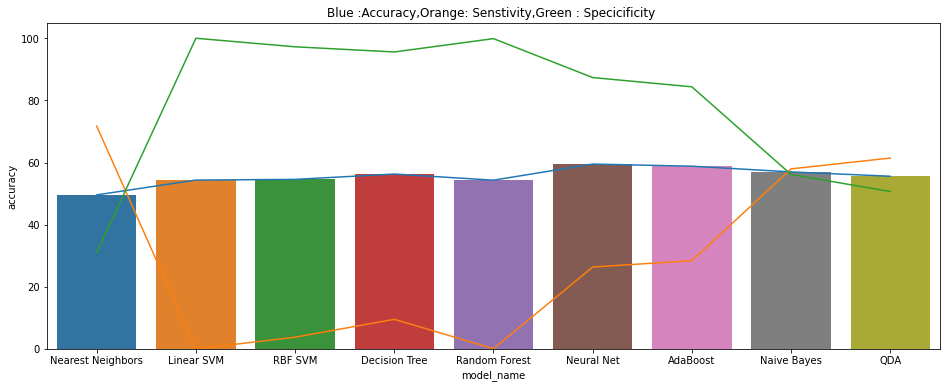







Pickled Neural Net classifier Model as it as the highest accuracy

[Sentiment factor-Individual](https://colab.research.google.com/drive/1GXJYUaoCmQsyFhdtgsrJFAjLRoi9Pvzr?usp=sharing)

In [ ]:
!pip install nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import re
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
from collections import Counter
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader')

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import scipy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Error loading vader: Package 'vader' not found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


### **Downloading pickled models of TFIDF Vectorizer & Neural Net**

In [ ]:
!gdown --id 1Yuxk8aC7PTQJwJz8mw1Xn6uPyEU_vhm6
!gdown --id 1gabfL1LLI-iOtc9f5JI5EUyqQuHPHtku


Downloading...
From: https://drive.google.com/uc?id=1Yuxk8aC7PTQJwJz8mw1Xn6uPyEU_vhm6
To: /content/Neural Net
100% 766k/766k [00:00<00:00, 50.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gabfL1LLI-iOtc9f5JI5EUyqQuHPHtku
To: /content/tfidf
100% 160k/160k [00:00<00:00, 57.0MB/s]


### **Generating POS Tags**

In [ ]:
def get_POS_tags(statement):
  tokens = nltk.word_tokenize(statement)
  text = nltk.Text(tokens)
  tags = nltk.pos_tag(text)
  counts = Counter(tag for word,tag in tags)
  noun_counts=counts['NN']+counts['NNS']+counts['NNP']+counts['NNPS']
  verb_counts=counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBG']
  adverbverb_counts=counts['VB']+counts['VBD']+counts['VBG']+counts['VBN']+counts['VBP']+counts['VBG']
  adjective_counts=counts['JJ']+counts['JJR']+counts['JJS']
  possessive_ending_counts=counts['POS']
  return noun_counts,verb_counts,adverbverb_counts,adjective_counts,possessive_ending_counts

### **Generating sentiment score**

Using Neural Net pickled model & tfidf vectorizer to predict sentiment score

In [ ]:
def get_sentiment_score(statement):
  model=pickle.load(open('/content/Neural Net', 'rb'))
  tfidf_vect=pickle.load(open('/content/tfidf', 'rb'))
  stop_words = set(stopwords.words('english'))
  stemmer = SnowballStemmer("english")
  lem=WordNetLemmatizer()
  analyzer = SentimentIntensityAnalyzer()

  p_statement= re.sub(r"\W", " ",str(statement))
  p_statement=re.sub(r'[,\.!?]', " ",str(p_statement))
  p_statement=re.sub(r" \d+", " ",str(p_statement))
  p_statement=word_tokenize(p_statement.lower())
  p_statement=' '.join(p_statement)
  p_statement=' '.join([word for word in p_statement.split() if word not in stop_words])
  p_statement=' '.join([lem.lemmatize(word) for word in p_statement.split()])
  p_statement=' '.join([stemmer.stem(word) for word in p_statement.split()])
  noun_counts,verb_counts,adverbverb_counts,adjective_counts,possessive_ending_counts=get_POS_tags(p_statement)

  compound= analyzer.polarity_scores(p_statement)['compound']
  neg=  analyzer.polarity_scores(p_statement)['neg'] 
  neu = analyzer.polarity_scores(p_statement)['neu']
  pos = analyzer.polarity_scores(p_statement)['pos']

  X=[noun_counts,verb_counts,adverbverb_counts,adjective_counts,possessive_ending_counts,compound,neg,neu,pos]
  vector=tfidf_vect.transform([p_statement])

  final_input=scipy.sparse.hstack((vector,X),format='csr')
  
  prediction=model.predict(final_input)
  prediction_probability=model.predict_proba(final_input)[:,1]
  return prediction_probability.item(0)

In [ ]:
get_sentiment_score('sad')

0.3001182723057658

# **Team member - Preeti Parihar**
### **Topic - Speech Tone Detection**

#### **Factor - Toxicity**
Online hate speech has been around since the dawn of the internet, but social media has played a key role in its development. Hate speech is defined as “public communication that expresses hatred or advocates violence toward a person or group based on something such as race, religion, sex, or sexual orientation,” according to the Cambridge Dictionary.
#### **Micro Factor**
  * Severe Toxic
  * Obscene
  * Threat
  * Insult
  * Identity attack
  * Hate Speech
  * Polarity
  * Readability
  * Offensive language
  * Target

### **Datasets**
  * Jigsaw Dataset
  * Twitter Hate Speech
  * Stream Data - https://newsapi.org
  * Politi Fact - For Inference

### **Models Generated For Following Feature Individually**
  * Obscene
  * Threat
  * Insult
  * Identity attack
  * Hate Speech
  * Polarity
  * Readability
  * Target

### **List of ML operations**
  * **Get Top K Predictions**
  * **Use TFIDF Vectorizer**
  * **Generated Models Using Muller Loop**
    Following list of classifiers were used to train the model and selected best model.
    * Logistic Regression
    * Stochastic Gradient Descent (SGD) Classifier
    * XGB Classifier
    * Random Forest Classifier
  * **Load model and transformer**
  Load model and transformer from google drive
  * **Save Model**
  Save model and transformer to google drive
  * **Infer and Load**
  Run inference on unseen data after loading model and transformer

### **Combined All ML Models**
  * Using polynomial equations (weighted model scores)

### **Results**
  * Result printed using Truth-O-Meter for Toxicity

### **Pipeline For Inference** - running 20 inference on live data and on politifact data

### **Accuracy of Individual Models** - Best Classifier selected using muller loop

---
| # | Feature Name | Classifier             | Accuracy |
|---|--------------|------------------------|----------|
| 1 | Target       | LogisticRegression     | 0.84     |
|   |              | SGDClassifier          | 0.9      |
|   |              | XGBClassifier          | 0.91     |
|   |              | RandomForestClassifier | 0.91     |
| 2 | Threat       | LogisticRegression     | 0.99     |
|   |              | SGDClassifier          | 0.99     |
|   |              | XGBClassifier          | 0.96     |
|   |              | RandomForestClassifier | 0.91     |
| 3 | Obscene      | LogisticRegression     | 0.84     |
|   |              | SGDClassifier          | 0.98     |
|   |              | XGBClassifier          | 0.90     |
|   |              | RandomForestClassifier | 0.88     |
| 4 | Identity     | LogisticRegression     | 0.84     |
|   |              | SGDClassifier          | 0.92     |
|   |              | XGBClassifier          | 0.78     |
|   |              | RandomForestClassifier | 0.83     |
| 5 | Redability   | LogisticRegression     | 0.16     |
|   |              | SGDClassifier          | 0.15     |
|   |              | XGBClassifier          | 0.20     |
|   |              | RandomForestClassifier | 0.18     |
| 6 | Polarity     | LogisticRegression     | 0.84     |
|   |              | SGDClassifier          | 0.83     |
|   |              | XGBClassifier          | 0.85     |
|   |              | RandomForestClassifier | 0.86     |
| 7 | HateSpeech   | LogisticRegression     | 0.87     |
|   |              | SGDClassifier          | 0.79     |
|   |              | XGBClassifier          | 0.88     |
|   |              | RandomForestClassifier | 0.88     |

#*True-o-meter For Toxicity*
    1 - No Toxicity

    2 - Barely Toxic

    3 - Low Toxic

    4 - Half Toxic

    5 - Moderately Toxic

    6 - Severely Toxic


### **Individual work colab link** - https://colab.research.google.com/drive/1Uu94QSWss36ydVOHq6S5a_o_SXLWO30a?usp=sharing

The ARI assesses the U.S. grade level required to read a piece of text.

https://readable.com/readability/automated-readability-index/


In [ ]:
def readability_grade(score):
    if score <= 6:
        return "Kindergarten"
    elif score <= 7:
        return "First Grade"
    elif score <= 8:
        return "Second Grade"
    elif score <= 9:
        return "Third Grade"
    elif score <= 10:
        return "Fourth Grade"
    elif score <= 11:
        return "Fifth Grade"
    elif score <= 12:
        return "Sixth Grade"
    elif score <= 13:
        return "Seventh Grade"
    elif score <= 14:
        return "Eight Grade"
    elif score <= 15:
        return "Ninth Grade"
    elif score <= 15:
        return "Ninth Grade"
    elif score <= 16:
        return "Tenth Grade"
    elif score <= 17:
        return "Eleventh Grade"
    elif score <= 17:
        return "Twelfth Grade"
    elif score >= 18:
        return "College Grade"

def get_top_k_predictions(model, X_test, k):
    import numpy as np
    # get probabilities instead of predicted labels, since we want to collect top 3
    probs = model.predict_proba(X_test)
    top_k_probs = probs[0][:k]
    # print(top_k_probs)
    # GET TOP K PREDICTIONS BY PROB - note these are just index
    best_n = np.argsort(probs, axis=1)[:,-k:]
    # print(best_n)
    
    # GET CATEGORY OF PREDICTIONS
    preds=[[(model.classes_[predicted_cat], probs) for predicted_cat, probs in zip(prediction, top_k_probs)] for prediction in best_n]
    
    preds=[ item[::-1] for item in preds]
    
    return preds


def load_model_transformer(model_name, transformer_name):
  import pickle
  try:
    model_path = "/content/drive/MyDrive/The-Elite/Semester_Project/Preeti/models/" + model_name
    model_file = open(model_path, "rb")
    model = pickle.load(model_file)

    transformer_path = "/content/drive/MyDrive/The-Elite/Semester_Project/Preeti/models/" + transformer_name
    transformer_file = open(transformer_path, "rb")
    transformer = pickle.load(transformer_file)
    return model, transformer, None

  except Exception as e:
    return None, None, e

def load_and_infer(model_name, transformer_name, text, feature, top_k=2):
  model, transformer, err = load_model_transformer(model_name, transformer_name)
  if err:
    print(str(err))
    return

  X_test = transformer.transform(text)
  preds = get_top_k_predictions(model, X_test, top_k)

  if feature.lower() == "readability":
    grades = []
    for c in preds[0]:
      grades.append((readability_grade(c[0]), c[1]))

    grades = sorted(grades, key=lambda x: x[1], reverse=True)      
    return grades
  elif feature.lower() == "polarity":
    sentiments = []
    for c in preds[0]:
      if c[0] == 0:
        sentiments.append(("neutral", c[1]))
      elif c[0] == 1:
        sentiments.append(("positive", c[1]))
      elif c[0] == -1:
        sentiments.append(("negative", c[1]))
    sentiments = sorted(sentiments, key=lambda x: x[1], reverse=True)
    return sentiments  
  elif feature.lower() == "hate-speech":
    hate_speech = []
    for c in preds[0]:
      if c[0] == 0:
        hate_speech.append(("neither", c[1]))
      elif c[0] == 1:
        hate_speech.append(("offensive language", c[1]))
      elif c[0] == 2:
        hate_speech.append(("hate speech", c[1]))
    hate_speech = sorted(hate_speech, key=lambda x: x[1], reverse=True)        
    return hate_speech  
  elif feature.lower() == "toxicity":
    toxicity = []
    for c in preds[0]:
      if c[0] == 0:
        toxicity.append(("not toxic ", c[1]))
      elif c[0] == 1:
        toxicity.append(("toxic", c[1]))
    toxicity = sorted(toxicity, key=lambda x: x[1], reverse=True)        
    return toxicity  
  elif feature.lower() == "threat":
    threat = []
    for c in preds[0]:
      if c[0] == 0:
        threat.append(("no threat ", c[1]))
      elif c[0] == 1:
        threat.append(("threat", c[1]))
    threat = sorted(threat, key=lambda x: x[1], reverse=True)        
    return threat  
  elif feature.lower() == "insult":
    insult = []
    for c in preds[0]:
      if c[0] == 0:
        insult.append(("no insult ", c[1]))
      elif c[0] == 1:
        insult.append(("insult", c[1]))
    insult = sorted(insult, key=lambda x: x[1], reverse=True)        
    return insult  
  elif feature.lower() == "obscene":
    obscene = []
    for c in preds[0]:
      if c[0] == 0:
        obscene.append(("not obscene ", c[1]))
      elif c[0] == 1:
        obscene.append(("obscene", c[1]))
    obscene = sorted(obscene, key=lambda x: x[1], reverse=True)        
    return obscene  
  elif feature.lower() == "identity_attack":
    identity_attack = []
    for c in preds[0]:
      if c[0] == 0:
        identity_attack.append(("no identity attack ", c[1]))
      elif c[0] == 1:
        identity_attack.append(("identity attack", c[1]))
    identity_attack = sorted(identity_attack, key=lambda x: x[1], reverse=True)        
    return identity_attack  

  else:
    return "invalid feature name"

## **Combine All Models Using Polynomial Equation (weighted model score)**

In [ ]:
def combined_models(text):
  all_acc_score = [0.9125, 0.9975, 0.985, 0.9875, 0.18878, 0.86930, 0.88221]
  model_acc = sum(all_acc_score)/len(all_acc_score)

  all_acc_score.sort(reverse=True)
  weights = [float(i)/sum(all_acc_score) for i in all_acc_score]

  prob_toxicity = weights[0] * load_and_infer("model_toxicity.model", "toxicity_transformer.pkl", [text], "toxicity", 1)[0][1]
  prob_threat = weights[1] * load_and_infer("model_threat.model", "threat_transformer.pkl", [text], "threat", 1)[0][1]
  prob_obscene = weights[2] * load_and_infer("model_obscene.model", "obscene_transformer.pkl", [text], "obscene", 1)[0][1]
  prob_identity_attack = weights[3] * load_and_infer("model_identity_attack.model", "identity_attack_transformer.pkl", [text], "identity_attack", 1)[0][1]
  prob_readability = weights[4] * load_and_infer("model_readability.model", "readability_transformer.pkl", [text], "readability", 1)[0][1]
  prob_polarity = weights[5] *  load_and_infer("model_polarity.model", "polarity_transformer.pkl", [text], "polarity", 1)[0][1]
  prob_hate_speech = weights[6] * load_and_infer("model_hate_speech.model", "hate_speech_transformer.pkl", [text], "hate-speech", 1)[0][1]

  sumW = prob_toxicity + prob_threat + prob_obscene + prob_identity_attack + prob_readability + prob_polarity + prob_hate_speech
  if sumW <= 0.10:
    return "No Toxic: " + str(round(sumW, 2)), model_acc, 1 
  elif sumW > 0.10 and sumW <= 0.20:
    return "Barely Toxic: " + str(round(sumW, 2)), model_acc, 2
  elif sumW > 0.20 and sumW <= 0.30:
    return "Low Toxic: " + str(round(sumW, 2)), model_acc, 3
  elif sumW > 0.30 and sumW <= 0.50:
    return "Half Toxic: " + str(round(sumW, 2)), model_acc, 4
  elif sumW > 0.50 and sumW <= 0.70:
    return "Moderately Toxic: " + str(round(sumW, 2)), model_acc, 5
  elif sumW > 0.70:
    return "Severely Toxic: " + str(round(sumW, 2)), model_acc, 6

###**Result For Toxicity Using Truth-O-Meter**

In [ ]:
result = combined_models("Don't you dre to talk to me like that, I will kill you")
print(result)

('Moderately Toxic: 0.68', 0.8318271428571429, 5)


## **Run Inference on all combined ML models from Politi Fact scrapped data**

In [ ]:
import pandas as pd
liar_df = pd.read_csv("/content/drive/MyDrive/The-Elite/Semester_Project/Preeti/datasets/politifact.csv")


for id, stmt in enumerate(liar_df.statement):
  out = combined_models(stmt)
  print(out)
  if id > 20:
    break

('Severely Toxic: 0.72', 0.8318271428571429, 6)
('Moderately Toxic: 0.67', 0.8318271428571429, 5)
('Moderately Toxic: 0.7', 0.8318271428571429, 5)
('Moderately Toxic: 0.7', 0.8318271428571429, 5)
('Severely Toxic: 0.71', 0.8318271428571429, 6)
('Moderately Toxic: 0.69', 0.8318271428571429, 5)
('Moderately Toxic: 0.7', 0.8318271428571429, 5)
('Moderately Toxic: 0.68', 0.8318271428571429, 5)
('Moderately Toxic: 0.68', 0.8318271428571429, 5)
('Severely Toxic: 0.71', 0.8318271428571429, 6)
('Moderately Toxic: 0.69', 0.8318271428571429, 5)
('Moderately Toxic: 0.69', 0.8318271428571429, 5)
('Moderately Toxic: 0.66', 0.8318271428571429, 5)
('Moderately Toxic: 0.69', 0.8318271428571429, 5)
('Severely Toxic: 0.7', 0.8318271428571429, 6)
('Severely Toxic: 0.7', 0.8318271428571429, 6)
('Moderately Toxic: 0.68', 0.8318271428571429, 5)
('Moderately Toxic: 0.68', 0.8318271428571429, 5)
('Severely Toxic: 0.71', 0.8318271428571429, 6)
('Moderately Toxic: 0.64', 0.8318271428571429, 5)
('Moderately Toxi

### **Read live NEWS articles**

In [ ]:
ARTICLE_COUNT = 20
def get_news_articles():
    API_KEY = "f682b24e753f472ea186141ff4f68328"
    url = "https://newsapi.org/v2/top-headlines?country=us&category=business&apiKey=" + API_KEY
    resp = requests.get(url)
    if resp and resp.status_code == 200:
        
        return resp.json()["articles"][:ARTICLE_COUNT]
    return None

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### **Convert HTML to text and Tokenization**

In [ ]:
def html_to_text(url):
  from bs4 import BeautifulSoup
  from bs4.element import Comment
  import urllib.request

  def tag_visible(element):
      if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
          return False
      if isinstance(element, Comment):
          return False
      return True


  def text_from_html(body):
      soup = BeautifulSoup(body, 'html.parser')
      texts = soup.findAll(text=True)
      visible_texts = filter(tag_visible, texts)  
      return u" ".join(t.strip() for t in visible_texts)


  html = urllib.request.urlopen(url).read()
  page_text = text_from_html(html)
  my_list = nltk.tokenize.sent_tokenize(page_text) #Split into list of sentences.
  content = "\n".join(my_list)
  return content

## **Run Inference on all combined ML models from live streamed data**

In [ ]:
import requests
def InferOnStreamingData():
  news_articles = get_news_articles()
  for id, article in enumerate(news_articles):
      try:
          url = article["url"]
          print("Reading article:", str(id), " at URL: ", url)
          content = html_to_text(url)
          result = combined_models(content)                    
          print("Result: ", result)
      except Exception as e:
          print("Error while fetching: ", url, ", error:", str(e))

In [ ]:
InferOnStreamingData()

Reading article: 0  at URL:  https://www.investors.com/market-trend/stock-market-today/dow-jones-futures-stock-market-rally-revs-higher-google-microsoft-flash-buy-signals-what-to-do-now/
Error while fetching:  https://www.investors.com/market-trend/stock-market-today/dow-jones-futures-stock-market-rally-revs-higher-google-microsoft-flash-buy-signals-what-to-do-now/ , error: HTTP Error 403: Forbidden
Reading article: 1  at URL:  https://www.theverge.com/2021/12/7/22822332/amazon-server-aws-down-disney-plus-ring-outage
Result:  ('Moderately Toxic: 0.69', 0.8318271428571429, 5)
Reading article: 2  at URL:  https://www.cnbc.com/2021/12/07/microsoft-will-change-hiring-practices-after-doj-labor-settlement.html
Result:  ('Moderately Toxic: 0.67', 0.8318271428571429, 5)
Reading article: 3  at URL:  https://www.cnbc.com/2021/12/07/ford-is-doing-whatever-it-takes-to-double-production-capacity-for-electric-f-150-pickup-says-ceo.html
Result:  ('Moderately Toxic: 0.67', 0.8318271428571429, 5)
Readi

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


Result:  ('Severely Toxic: 0.72', 0.8318271428571429, 6)
Reading article: 14  at URL:  https://www.cnbc.com/2021/12/07/retail-icon-mickey-drexler-on-breaking-up-retailers-i-dont-get-it.html
Result:  ('Moderately Toxic: 0.66', 0.8318271428571429, 5)
Reading article: 15  at URL:  https://www.cnn.com/2021/12/07/tech/bitcoin-creator-trial-fortune/index.html
Result:  ('Severely Toxic: 0.7', 0.8318271428571429, 6)
Reading article: 16  at URL:  https://www.kitco.com/news/2021-12-07/Will-it-be-gold-or-U-S-dollar-at-new-record-highs-in-2022-I-m-bullish-on-gold-says-NDR-s-chief-global-investment-strategist.html
Result:  ('Severely Toxic: 0.7', 0.8318271428571429, 6)
Reading article: 17  at URL:  https://www.cnbc.com/2021/12/07/stitch-fix-sfix-q1-2022-earnings.html
Result:  ('Moderately Toxic: 0.67', 0.8318271428571429, 5)
Reading article: 18  at URL:  https://www.theverge.com/2021/12/7/22822454/power-companies-utilities-ev-fast-charging-network
Result:  ('Moderately Toxic: 0.68', 0.8318271428571

# **Team Member-Priyanka Devendran**

## **Stance Factor**

**Stance detection**

Stance detection is the process of extraction of a subject's reaction to a claim made by a primary actor. It is a core part of a set of approaches to fake news assessment.

**Objective**

Fake news is defined as a “made up story with an intention to deceive, geared towards getting clicks”. Stance Detection is one of the factors influencing fake news detection. It is not practical for humans to fact check every piece of information produced by the media. Hence, the goal of this project is to use natural language processing (NLP) techniques to automate stance detection to determine the quality of the news source. It considers what other organizations write about the same subject. A body of the text is claimed to agree, disagree, discuss, or be unrelated to a subject.

**MicroFactors**
1. Reaction unrelated disagree, agree, discuss and unrelated
2. TF-IDF of words in statements can help us identify stance
3. Named entity relation 
4. Similar Statements tend to have Similar Stance 


**Datasets**

Liar-Liar Dataset
Politi Fact - For Inference
Twitter

**Model**
Trained 6 different models ("Logistic regression", "Decision Tree", "Random Forest", "KNN", "Naive Bayes") to predict fakeness of statement between 1-6 using all the microfactors after distillation. 

Random Forest model gave the higest accuracy score of compared to other models, which is extracted and stored.


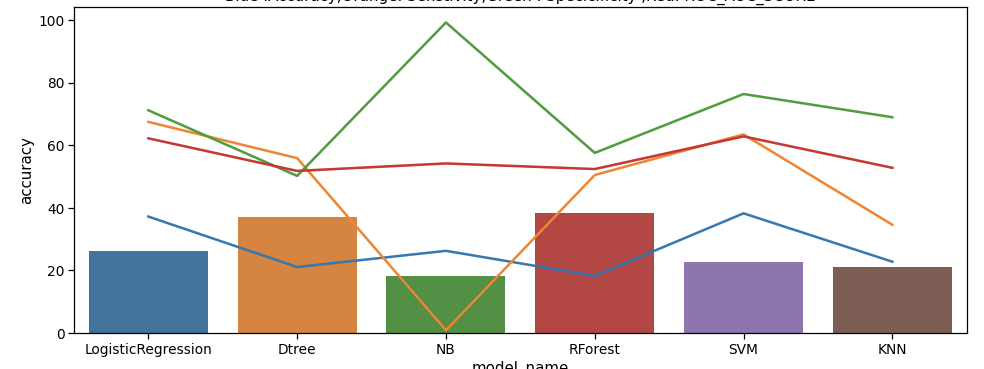

In [ ]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
import joblib 
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize
from nltk.tokenize import word_tokenize
import pandas as pd
import gdown

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
url='https://drive.google.com/uc?id=19_OSXUTqzkkmZfHbB84B1zJwNjN2Fdxe'
output= "le_speaker_job_title_code.pkl"
gdown.download(url,output,quiet=False)
le_speaker_job_title_code=joblib.load('le_speaker_job_title_code.pkl')

url='https://drive.google.com/uc?id=1MsEv8mclaVusSe9C7h_2jlCXusSM1dwB'
output= "le_speaker.pkl"
gdown.download(url,output,quiet=False)
le_speaker=joblib.load('le_speaker.pkl')

url='https://drive.google.com/uc?id=1TBALWJjMRSBPCrS0D1m49784aE3F2Bb4'
output= "RForest.pkl"
gdown.download(url,output,quiet=False)
loaded_model=joblib.load('RForest.pkl')

url='https://drive.google.com/uc?id=1QIYM0h6v6zc84y-rvCGbi_aGwJhmlHSL'
output= "le_state_info_code.pkl"
gdown.download(url,output,quiet=False)
le_state_info_code=joblib.load('le_state_info_code.pkl')

url='https://drive.google.com/uc?id=1FVqiACCZHDr-4NDYYT8RWUxz6Ch28-TC'
output= "vectorizer.pkl"
gdown.download(url,output,quiet=False)
vector=joblib.load('vectorizer.pkl')

url='https://drive.google.com/uc?id=1zV2giAiQI6Qquzf1KZhGJ2o1Z1qee1ad'
output= "XGB.pkl"
gdown.download(url,output,quiet=False)
model=joblib.load('XGB.pkl')

Downloading...
From: https://drive.google.com/uc?id=19_OSXUTqzkkmZfHbB84B1zJwNjN2Fdxe
To: /content/le_speaker_job_title_code.pkl
100%|██████████| 46.7k/46.7k [00:00<00:00, 17.3MB/s]
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
Downloading...
From: https://drive.google.com/uc?id=1MsEv8mclaVusSe9C7h_2jlCXusSM1dwB
To: /content/le_speaker.pkl
100%|██████████| 72.7k/72.7k [00:00<00:00, 56.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1TBALWJjMRSBPCrS0D1m49784aE3F2Bb4
To: /content/RForest.pkl
100%|██████████| 43.8M/43.8M [00:00<00:00, 175MB/s]
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimato

In [ ]:
stop_words = set(stopwords.words('english')) 
vector=joblib.load('vectorizer.pkl')
loaded_model=joblib.load('RForest.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:333: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.22.2.post1 when using version 1.0.1. This might lead to breaking code or inva

In [ ]:
def getStaances(statement):

  df=pd.DataFrame([])
  df['Stance']=get_stances(statement)
  prediction=model.predict(df)
  prediction_probability=model.predict_proba(df)
  return prediction_probability.tolist()[0]

In [ ]:
def getStanceScore(statement):
  val=3256
  accu=0.42
  new_statement= re.sub(r"\W", " ",str(statement))
  new_statement=re.sub(r'[,\.!?]', " ",str(new_statement))
  new_statement=re.sub(r" \d+", " ",str(new_statement))
  new_statement=word_tokenize(new_statement.lower())
  new_statement=' '.join(new_statement)
  new_statement=' '.join([word for word in new_statement.split() if word not in stop_words])
  liar_model = vector.transform([new_statement])
  # stance=loaded_model.predict([[8,90]])
  # print(liar_model)
  stance=loaded_model.predict_proba(liar_model)
  # print(stance)
  return stance[0][0]

# getStanceScore("I will kill you")

#**Combining All Factors Using Polynomial Equation**
    Sentiment
    Toxicity
    Stance
    Veracity
##**Generating Truthfulness on True-O-Meter**
    1 - true
    2 - moderately true
    3 - half true
    4 - barely true
    5 - false
    6 - pants on fire

##**Pipeline For Inference** - running 20 inference on live data

In [ ]:
def GetToxicityScore(text):
  """
  GetToxicityScore() return a tuple with predicted probabilty, overall combined probabilities and Toxicity numeric score [1-6]
  toxicity_score[0] = Predicted Probabilty for unseen text
  toxicity_score[1] = Seven trained models combined model probabilties
  toxicity_score[2] = Toxicity numeric score [1-6]
  """

  if not text:
    text = "Don't dare to talk to me like that, I will kill you"

  score = combined_models(text)
  return score


def TruthScore(statement):
  """
    index 0: Sentiment Model Accuracy 
    index 1: Stance Model Accuracy
    index 2: Toxicity Model Accuracy
    index 3: Veracity Model Accuracy
  """
  toxicity_score = GetToxicityScore(statement)
  sentiment_score = get_sentiment_score(statement)
  stance_score = getStanceScore(statement)
  #veracity_score, acc = get_veracity_scores_accuracy(statement)
  veracity_score = 0.26

  result = {
      "Toxicity": "",
      "Sentiment": sentiment_score,
      "Stance": stance_score,
      "Veracity": veracity_score
  }
  # accur = [sentiment_score, stance_score[1], toxicity_score[1], veracity_score[1]]
  accur = [0.30, 0.42, 0.81, 0.27]
  w = [float(i)/sum(accur) for i in accur]
  sumW = 0
  prob = []
  
  if statement!="":
    prob.append(w[0] * sentiment_score)
    sumW += w[0] * sentiment_score
  
  if (statement!=''):
  
    prob.append(w[1] * stance_score)
    sumW += w[1]
  
  if statement:
    
    x = toxicity_score[0].split(":")[1].strip()
    result["Toxicity"] = str(x) #+ ", " + str(toxicity_score[2])
    prob.append(w[2] * toxicity_score[1])
    sumW += w[2]

  if statement!="":
    prob.append(w[3] * 0.27) # veracity_score[1])
    sumW += w[3]

  score = sum(prob)/sumW
  a = 0
  if score <= 0.20:
    a = 1, "True" 
  elif score > 0.20 and score <= 0.50:
    a = 2, "Moderately True"
  elif score > 0.50 and score <= 0.65:
    a = 3, "Half True"
  elif score > 0.65 and score <= 0.70:
    a = 4, "Barely True"
  elif score > 0.70 and score <= 0.85:
    a = 5, "False"
  elif score > 0.85:
    a = 6, "Pants On Fire"

  result["TruthScore"] = a
  return result

In [ ]:
result = TruthScore("Don't dare to talk to me like that, I will kill you")
result

{'Sentiment': 0.30267299667758335,
 'Stance': 0.4766666666666666,
 'Toxicity': '0.7',
 'TruthScore': (4, 'Barely True'),
 'Veracity': 0.26}

In [ ]:
import requests
def InferAllOnStreamingData():
  news_articles = get_news_articles()
  for id, article in enumerate(news_articles):
      try:
          url = article["url"]
          print("Reading article:", str(id), " at URL: ", url)
          content = html_to_text(url)
          result = TruthScore(content)                    
          print("Result: ", result)
      except Exception as e:
          print("Error while fetching: ", url, ", error:", str(e))

In [ ]:
InferAllOnStreamingData()

Reading article: 0  at URL:  https://www.npr.org/2021/12/07/1062240467/kellogg-to-hire-replacements-for-striking-workers-who-rejected-a-proposed-contra
Result:  {'Toxicity': '0.67', 'Sentiment': 0.005251667549735749, 'Stance': 0.7806666666666666, 'Veracity': 0.26, 'TruthScore': (5, 'False')}
Reading article: 1  at URL:  https://www.foxbusiness.com/markets/apple-tim-cook-secret-deal-china
Result:  {'Toxicity': '0.7', 'Sentiment': 0.006917403341786234, 'Stance': 0.775142857142857, 'Veracity': 0.26, 'TruthScore': (5, 'False')}
Reading article: 2  at URL:  https://www.youtube.com/watch?v=7Bo_Flfol1k
Result:  {'Toxicity': '0.68', 'Sentiment': 0.20443263128284572, 'Stance': 0.6338333333333334, 'Veracity': 0.26, 'TruthScore': (4, 'Barely True')}
Reading article: 3  at URL:  https://www.theverge.com/2021/12/7/22823093/twitter-new-ceo-parag-agrawal-move-faster-interview
Result:  {'Toxicity': '0.68', 'Sentiment': 0.054396636161517783, 'Stance': 0.75, 'Veracity': 0.26, 'TruthScore': (5, 'False')}